In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
weather = pd.read_csv("weatherAUS.csv")


In [3]:
weather["MinTemp"].fillna(value=np.mean(weather["MinTemp"]),inplace=True)
weather["MaxTemp"].fillna(value=np.mean(weather["MaxTemp"]),inplace=True)
weather["Humidity9am"].fillna(value=np.mean(weather["Humidity9am"]),inplace=True)
weather["Humidity3pm"].fillna(value=np.mean(weather["Humidity3pm"]),inplace=True)
weather["Temp9am"].fillna(value=np.mean(weather["Temp9am"]),inplace=True)
weather["Temp3pm"].fillna(value=np.mean(weather["Temp3pm"]),inplace=True)
weather["WindSpeed9am"].fillna(value=np.mean(weather["WindSpeed9am"]),inplace=True)
weather["WindSpeed3pm"].fillna(value=np.mean(weather["WindSpeed3pm"]),inplace=True)
weather["Pressure9am"].fillna(value=np.mean(weather["Pressure9am"]),inplace=True)
weather["Pressure3pm"].fillna(value=np.mean(weather["Pressure3pm"]),inplace=True)
weather["Rainfall"].fillna(value=np.mean(weather["Rainfall"]),inplace=True)
weather["WindGustSpeed"].fillna(value=np.mean(weather["WindGustSpeed"]),inplace=True)
weather["Evaporation"].fillna(value=np.mean(weather["Evaporation"]),inplace=True)
weather.drop("Sunshine",axis=1,inplace=True)
weather.drop(["Cloud9am","Cloud3pm"],axis=1,inplace=True)
weather.drop(["WindDir3pm","WindDir9am"],axis=1,inplace=True)
weather.drop("WindGustDir",axis=1,inplace=True)

In [4]:


weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
def converter(x):
    if(x=="Yes"):
        return 1
    else:
        return 0

In [6]:
weather["RTod"]=weather["RainToday"].apply(converter)
weather["RTom"]=weather["RainTomorrow"].apply(converter)
weather["RainTomorrow"].value_counts()
weather["RainTomorrow"].isna().value_counts()
weather["RainTomorrow"].dropna(inplace=True)

<AxesSubplot:>

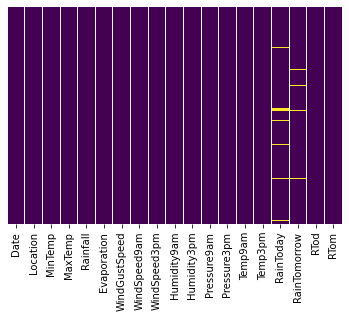

In [7]:
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap="viridis")



In [8]:
data=weather.drop(["Date","Location","RainToday","RainTomorrow"],axis=1)
from sklearn.model_selection import train_test_split


In [9]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RTod,RTom
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0,0


In [10]:
data=weather.drop(["Date","Location","RainToday","RainTomorrow"],axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RTod,RTom
0,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [11]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RTod,RTom
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0,0


In [12]:
X=data.drop("RTom",axis=1)
Y=data["RTom"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [16]:
RFC_pred=RFC.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(Y_test,RFC_pred))
print("\n")
print(classification_report(Y_test,RFC_pred))

[[35724  1643]
 [ 5602  5033]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37367
           1       0.75      0.47      0.58     10635

    accuracy                           0.85     48002
   macro avg       0.81      0.71      0.74     48002
weighted avg       0.84      0.85      0.84     48002

